# Module 11 - Convolutional Neural Networks - Lab 1

<table class="tfo-notebook-buttons" align="left">
 <td>
 <a target="_blank" href="https://colab.research.google.com/drive/1WZWRO4HLHoAnX6yAq-93_GPEVwb5bkFA"><img height="32px" src="https://colab.research.google.com/img/colab_favicon.ico" />Run in Google Colab</a>
 </td>
 <td>
 <a target="_blank" href="https://github.com/Foundations-in-Modern-Machine-Learning/course-contents/blob/main/CNN/cnn_lab1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
 </td>
</table>
<br>
<br>
<br>

---
Module Coordinator: Ekta Gavas

Email: ekta.gavas@research.iiit.ac.in

## Description
---
In this lab exercise, we will examine the role of convolutions, starting with very basic examples of using popular filters like horizontal and vertical edge filters on grayscale images. We will also study various operations like convolution, strides, pool and padding by building our own function step-by-step *apply_filter()* to apply filter on image, with varying strides and padding. Then, we will also explore Pytorch functions (*Conv2d, MaxPool2d, AvgPool2d*) for the same. Finally, we will see an example of applying convolution on an RGB image as well.

Once you get a clear idea of how convolution works, you are required to complete a few simple exercises given at the end of this notebook.

## Starter Code
---
To make your task easier, we provide you the starter code to perform the lab exercises. It is expected that you should try to understand what the code does and analyze the output. We will be using OpenCV (a library for image processing), NumPy for matrix and array operations, and Matplotlib for plotting the images. Later, we will use Pytorch framework to analyze the effect of strides, pooling etc.

Central to Convolutional Neural Networks (CNN), a convolution operation is a linear operation which involves element-wise multiplication between a small filter (say, a matrix of integers) and filter-sized patch from the image. We move this filter across the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image. 

Let's look at the convolution formula:

Convolution between image $f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>


Image reference: [Streaming Architecture for Large-Scale Quantized Neural Networks on an FPGA-Based Dataflow Platform](https://www.researchgate.net/publication/318849314_Streaming_Architecture_for_Large-Scale_Quantized_Neural_Networks_on_an_FPGA-Based_Dataflow_Platform/figures?lo=1)

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

### Convolution and Edge detection

Let us first take a simplest case to detect vertical edge in image of the same size as the filter (say 3 x 3) 

In [ ]:
# Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

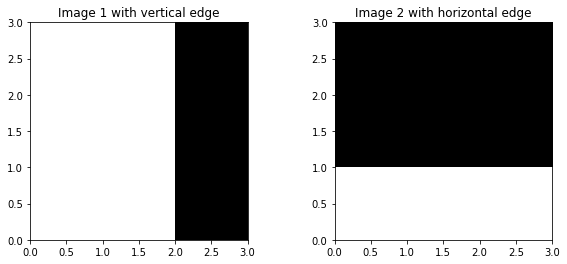

In [ ]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])

# print(image1*255)
# Let's plot the images
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
# plt.ylim(0, 3)
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

Let's create a 3x3 vertical edge filter. We will 'convolve' this filter over the images to detect vertical edge. As the image is same size as of filter, this is simple element-wise multiplication and summing up the result into single value.

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

In [ ]:
# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image.
Now, let's create a horizontal edge filter and apply it to both the above images.

In [ ]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


As expected, the horizontal edge is detected in second image with this filter. 

Now, we will take a bigger image (5 x 5) and see how a convolution operation works by sliding a filter left to right and top to bottom to obtain an output map from image. Let's define a function ***apply_filter()*** for this.

In [ ]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))
  
  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

Plotting function

In [ ]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray', 
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False, 
                labelleft=False, left=False)
  plt.show()

In [ ]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])


output = apply_filter(img, filter)
print(output) # Note the shape of output image!

[[60. 60.  0.]
 [60. 60.  0.]
 [60. 60.  0.]]


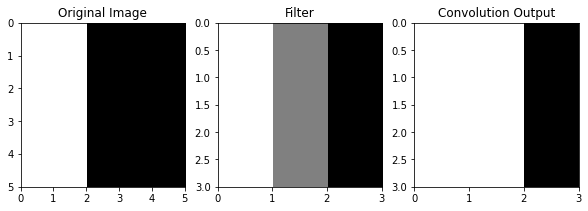

In [ ]:
# Let's plot the above image with results
images = []
titles = []

images.append(img)
titles.append('Original Image')

images.append(filter)
titles.append('Filter')

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)

As, you can see, horizontal edge is detected in the output.

Now, we will see the effect of applying this filter on a grayscale image. Again, for this, we need to 'convolve' the filter over the entire image.
We will use the same filter and function defined earlier.

In [ ]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    771      0 --:--:-- --:--:-- --:--:--   771
100  2815  100  2815    0     0   4723      0 --:--:-- --:--:-- --:--:--  4723


Original image size:  (99, 100)
Output image size:  (97, 98)


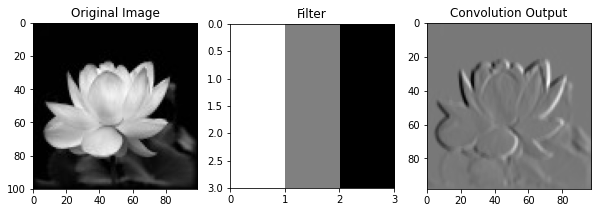

In [ ]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

The convolved outputs in both the above cases, is smaller than the original image. To get the result of same size, we use padding.

### Padding

We noted that the output image after convolution is smaller than the original. Here, we will understand the use of padding to get the image same as original size. We will modify the earlier function ***apply_filter()*** to pad the image first with 0s and then apply convolution. We can also extend our image by filling it with 0s but here we will see the use cv2.copyMakeBorder() from OpenCV for padding. Refer [Making Borders for Images (Padding)](https://docs.opencv.org/3.1.0/d3/df2/tutorial_py_basic_ops.html) for more information on the usage of this function. ***Just note the change in the function below.***

In [ ]:
def apply_filter(img, filter, padding=0):
  height, width = img.shape

  # Note the change below
  # Below function makes a border (padding) with zeros around image
  img = cv2.copyMakeBorder(img, padding,padding,padding,padding, cv2.BORDER_CONSTANT,value=[0])

  print('Image after padding: \n', img)

  new_height, new_width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, new_height - filter_size[1] + 1):
    for j in range(0, new_width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))
  
  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1) + 2*padding), (width - (filter_size[0]-1) + 2*padding) # Note the change in formula

  # Return the reshaped image
  return output.reshape(output_shape)

In [ ]:
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])
o = apply_filter(img, filter,1)

print('Output image: \n', o)

Image after padding: 
 [[ 0  0  0  0  0  0  0]
 [ 0 20 20  0  0  0  0]
 [ 0 20 20  0  0  0  0]
 [ 0 20 20  0  0  0  0]
 [ 0 20 20  0  0  0  0]
 [ 0 20 20  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
Output image: 
 [[-40.  40.  40.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-40.  40.  40.   0.   0.]]


Thus, we used padding to get output image size same as that of original image.

### Stride

Strides determine the number of units to shift while moving a filter over an image. To understand the working of strides, we will again modify the earlier function ***apply_filter()*** to incorporate the stride value. By default, the stride value was 1 earlier as we were shifting the filter one element in any direction. ***Just note the change in the function below.***

In [ ]:
def apply_filter(img, filter, padding=0, stride=1):
  height, width = img.shape

  # Below function makes a border (padding) with zeros around image
  img = cv2.copyMakeBorder(img, padding,padding,padding,padding, cv2.BORDER_CONSTANT,value=[0])

  new_height, new_width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, new_height - filter_size[1] + 1, stride):          # Note the change here
    for j in range(0, new_width - filter_size[0] + 1, stride):         # Note the change here
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))
  
  # Calculate the output shape of the resultant image
  output_shape = (((height - (filter_size[1]-1) + 2*padding -1) // stride)+1,
                  ((width - (filter_size[0]-1) + 2*padding -1)// stride)+1) # Note the change in formula!

  # Return the reshaped image
  return output.reshape(output_shape)

In [ ]:
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])
o = apply_filter(img, filter,padding=0, stride=2)

print('Output image: \n', o)

Output image: 
 [[60.  0.]
 [60.  0.]]


Thus, increasing the stride value decreases the output size further as we skip calculating some values. We will now see the effect of increasing strides, padding and kernel size on output.

#### Effect of padding, kernel size and stride
Instead of a convolution function we built earlier for applying filter/kernel to image, we will directly use convolution layer in the **Pytorch** framework. Refer [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) for more information about additional parameters.

In [ ]:
# Import pytorch packages
import torch
from torch.nn import Conv2d

##### Convolution in pytorch

We will define a helper function to create an square vertical edge filter of given size

In [ ]:
def generate_filter(k=3):
  kernel = np.ones((k, k))
  mid_index = k // 2
  kernel[:, mid_index].fill(0)
  kernel[:, mid_index+1:] *= -1
  return kernel

We will create a helper function that takes one of the kernel elements, create a Convolution layer using pytorch and return the output image

In [ ]:
def apply_conv(image, kernel_size, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  # Convert image to tensor from numpy
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  # Create a nxn kernel
  kernel = generate_filter(kernel_size)

  # Create a tensor from the numpy array
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER--------
  #1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)
  
  # ---------APPLY CONVOLUTION--------
  output = conv(input / 255.)  # Getting input from 0 to 1
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

##### Effect of Padding
Change the padding value with the slider. What do you observe?

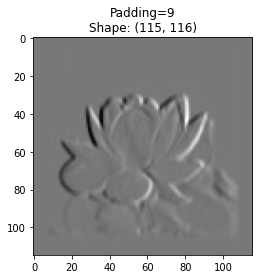

In [ ]:
#@title Effect of padding { run: "auto", vertical-output: true, display-mode: "both" }

# Note:After running this cell manually, it will auto-run if you 
# change the selected value.

# Our original lotus image
image = cv2.imread('lotus.jpg', 0)


# Apply 3x3 convolution to image with given padding 1 on all 4 sides
padding = 9 #@param {type:"slider", min:1, max:20, step:1}
n = apply_conv(image, 3, padding=padding)

# Plot the results
plt.imshow(n, cmap='gray')
plt.title('Padding={}\nShape: {}'.format(padding, str(n.shape)))
plt.show()

As you observed, the output shape changes with padding. More the padding, bigger will be the image.

##### Effect of Kernel size
Change the kernel size with the slider. What do you observe?

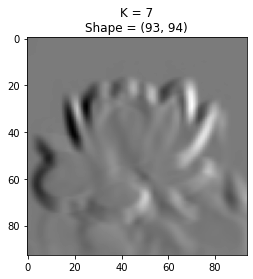

In [ ]:
#@title Effect of Kernel size { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
K = 7 #@param {type:"slider", min:3, max:21, step:2}
n = apply_conv(image, K)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('K = {}\nShape = {}'.format(K, str(n.shape)))
plt.show()

Thus, we conclude that output image becomes blurry with increase in kernel size as summation occurs over larger neighbourhood. Smaller kernel size is used to capture details whereas larger kernel captures bigger elements in image.

##### Effect of Stride
Change the stride value with the slider. What do you observe?

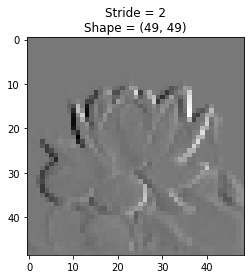

In [ ]:
#@title Effect of Stride { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
stride = 2 #@param {type:"slider", min:1, max:10, step:1}
n = apply_conv(image, 3, stride=stride)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('Stride = {}\nShape = {}'.format(stride, str(n.shape)))
plt.show()

As we can see, the output becomes pixelated as strides increase because we have fewer values in the output by skipping pixels in input. Also, hence size of output decreases. 

### Pooling
Strides, actually downsample the image but a more robust and common approach is pooling. It may be useful when we do not require finer details but important structural elements. Here, we will see an example of max pooling and average pooling on a simple 2D image matrix. Refer [nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) for the documentation.



Max Pooling & Average Pooling

Max Pooling:
 [[9. 8.]
 [7. 9.]]

Avg Pooling:
 [[2.5625 3.    ]
 [2.5625 1.9375]]



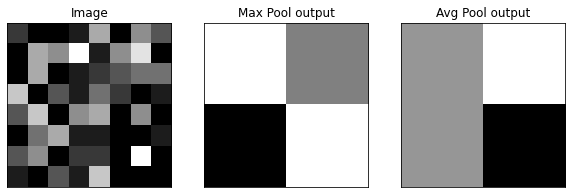

In [ ]:
from torch.nn import MaxPool2d, AvgPool2d
import warnings
warnings.filterwarnings('ignore')

# 2D image
image = np.array([
    [2, 0, 0, 1, 6, 0, 5, 3],
		[0, 6, 5, 9, 1, 5, 8, 0],
		[0, 6, 0, 1, 2, 3, 4, 4],
		[7, 0, 3, 1, 4, 2, 0, 1],
		[3, 7, 0, 5, 6, 0, 5, 0],
		[0, 4, 6, 1, 1, 0, 0, 1],
		[3, 5, 0, 2, 2, 0, 9, 0],
		[1, 0, 3, 1, 7, 0, 0, 0]])

# Saving output for plots
output = []
titles = []

output.append(image)
titles.append('Image')

image = torch.from_numpy(image.astype(np.float32))
input = image.view((1,1,image.shape[0], image.shape[1]))

#----------MAX POOLING LAYER--------
pool_layer = MaxPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))
print('Max Pooling:\n', max_output_img)
print()
output.append(max_output_img)
titles.append('Max Pool output')

#----------AVERAGE POOLING LAYER--------
pool_layer = AvgPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
avg_output_img = op.data.numpy()  # Tensor to back in numpy
avg_output_img = avg_output_img.reshape((-1, avg_output_img.shape[-1]))
print('Avg Pooling:\n',avg_output_img)
print()

output.append(avg_output_img)
titles.append('Avg Pool output')

plot_images(output, titles, tick_params=False)

### Convolution on RGB image (Convolution over volume)

<img src='https://i.stack.imgur.com/0B1Dr.png' height=220px>


Image Reference: [http://datahacker.rs/convolution-rgb-image/](http://datahacker.rs/convolution-rgb-image/)

Now, we will perform the convolution and max pooling operation on a RGB image with the edge filters same as above. The only change we make here is the number of input channels in the convolution layer and the filter volume.

In [ ]:
# Get sample RGB image
!curl -L -o 'image_rgb.jpg' 'https://drive.google.com/uc?export=download&id=1X_1ZWMmVcT-NVeHCcUok3uqQzw4VG3cc'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1235      0 --:--:-- --:--:-- --:--:--  1235
100 35382  100 35382    0     0  70482      0 --:--:-- --:--:-- --:--:-- 33.7M


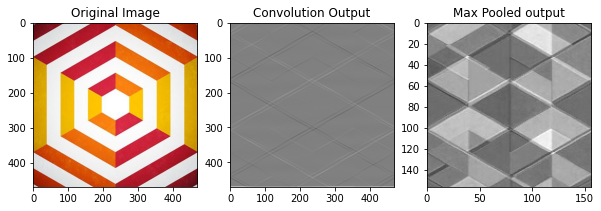

In [ ]:
image = cv2.imread('image_rgb.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = torch.from_numpy(image)

# Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
input = image.view((1,3,image.shape[0], image.shape[1])) # Note the no. of channels have changed to 3

# --------------KERNEL-------------
# Create a nxn kernel
kernel_e = generate_filter(3)

# Stack 3 filters together (1 filter for each channel of image)
kernel = np.dstack((kernel_e, kernel_e, kernel_e))

# Create a tensor from the numpy array
kernel = torch.from_numpy(kernel.astype(np.float32))

# Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
kernel = kernel.view((1,3,kernel.shape[0], kernel.shape[1]))

# ---------CONVOLUTION LAYER--------
# 1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
conv = Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1, stride=1) # For RGB

# Set the kernel weights in the convolution layer
conv.weight = torch.nn.Parameter(kernel)

# ---------APPLY CONVOLUTION--------
output = conv(input / 255.)  # Getting input from 0 to 1
output_img = output.data.numpy()  # Tensor to back in numpy
output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image


# ---------APPLY MAXPOOL-------------
pool_layer = MaxPool2d(kernel_size=3, stride=3)
op = pool_layer(output)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))


# Plot output
images = []
titles = []

images.append(image)
titles.append('Original Image')
images.append(output_img)
titles.append('Convolution Output')
images.append(max_output_img)
titles.append('Max Pooled output')
plot_images(images, titles)


Notice the number of input and output channels in the convolution layer and the kernel shape. We are using one kernel for each channel of image, so we stack 3 kernels together. Also, the output channel is just 1, thus, we obtain a grayscale output. Note that we are summing up the 27 values obtained multiplying the image patch with filter (3x3x3), so the number of channels get reduced to 1 in the output. Further, we max pool the convolution output to get a pattern as displayed in the image.

## Exercises

Q 1: Given a 1-D array [5, 6, 8, 1, 6, 9, 1, 2] and filter [-1, 1], find the convolved output (assume no padding and stride 1).

Answer:

Q 2: Given a 3 x 3 filter with all ones, can you guess what this filter will do when convolved with any image?

Answer:

Q 3: The image size is (500, 500) and filter size is 5. The filter is convolved on the image with a stride of 2 and padding 3. What is the obtained output shape?

Answer:

Q 4: Given an image \begin{bmatrix}
1 & 2 & 1 & 3 \\
2 & 3 & 1 & 1 \\
0 & 2 & 3 & 2 \\
1 & 1 & 2 & 3
\end{bmatrix} and a filter \begin{bmatrix}
-1 & 2 & 1 \\
-1 & 0 & 1 \\
-1 & 2 & 1
\end{bmatrix}
Find the convolution output with padding = 1 and stride = 2. Also, calculate the max pooled output with stride = 1 and kernel size = 2.

Answer:

Q 5: For an RGB image, what is the total number of parameters in the convolution filter of size K?

Answer:

### Bonus Question

When the lotus image (grayscale) is convolved with the 3x3 edge filter with stride 1 and padding 1 and then max pooled with stride 2 and kernel size 2 to obtain a final output map, what its final output shape? Can you perform the same operations on a RGB image?

Answer: 

## References and Additional Resources


*   [Padding and Stride in CNNs](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/)
*   [Convolution, Padding, Stride, and Pooling in CNN](https://medium.com/analytics-vidhya/convolution-padding-stride-and-pooling-in-cnn-13dc1f3ada26)
*   [A Gentle Introduction to Pooling layers in CNNs](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)
*   [Pooling vs Stride for Downsampling](https://stats.stackexchange.com/questions/387482/pooling-vs-stride-for-downsampling)

